In [4]:
import joblib
import os
from sklearn.model_selection import train_test_split
import numpy as np

import cv2

from tensorflow.keras.callbacks import EarlyStopping
import random
import matplotlib.pyplot as plt


In [2]:
model_path = os.path.join("../models", "random_forest_model_v3.pkl")

loaded_model = joblib.load(model_path)

In [3]:
DATASET_PATH = r"C:\Users\javid\OneDrive\Escritorio\Javidev\DS_Bootcamp\DS_Online_Octubre24\05_Deep_Learning\Sprint_17\Team_Challenge\asl_dataset"

In [4]:
# Obtener las clases disponibles (carpetas dentro del dataset)
clases = sorted(os.listdir(DATASET_PATH))  # ['0', '1', ..., '9', 'A', 'B', ..., 'Z']
num_clases = len(clases)

X = []
y = []

# Cargar imágenes y convertirlas a arrays
for label, clase in enumerate(clases):
    folder_path = os.path.join(DATASET_PATH, clase)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convertimos a escala de grises
        img = cv2.resize(img, (64, 64))  # Redimensionamos a 64x64 píxeles
        X.append(img.flatten())  # Convertimos la imagen en un vector
        y.append(label)  # Guardamos la etiqueta de la clase

# Convertir a arrays de numpy
X = np.array(X)
y = np.array(y)

# Mezclar los datos aleatoriamente
indices = np.arange(len(X))
np.random.shuffle(indices)

# Aplicar el desorden a X e y
X = X[indices]
y = y[indices]

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [6]:
loaded_model.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


KeyboardInterrupt: 

INPUT

In [2]:
dataset_path = r"C:\Users\javid\OneDrive\Escritorio\Javidev\DS_Bootcamp\DS_Online_Octubre24\05_Deep_Learning\Sprint_17\Team_Challenge\asl_dataset"

def mostrar_imagenes_de_palabra(palabra):
    '''
    Esta función itera en el dataset devolviendo cada caracter definido en el input con su correspondiente seña
    '''
    palabra = palabra.upper()  
    fig, axes = plt.subplots(1, len(palabra), figsize=(len(palabra) * 3, 3))  

    for i, letra in enumerate(palabra):
        letra_path = os.path.join(dataset_path, letra)  

        imagenes = os.listdir(letra_path)  
        if not imagenes:
            print(f"No hay imágenes en la carpeta {letra}")
            continue

        imagen_aleatoria = random.choice(imagenes)  # Seleccionar una imagen aleatoria
        imagen_path = os.path.join(letra_path, imagen_aleatoria)

        # Cargar la imagen
        imagen = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)  

        # Mostrarla en su subplot
        axes[i].imshow(imagen, cmap="gray")
        axes[i].set_title(letra)
        axes[i].axis("off")

    plt.show()


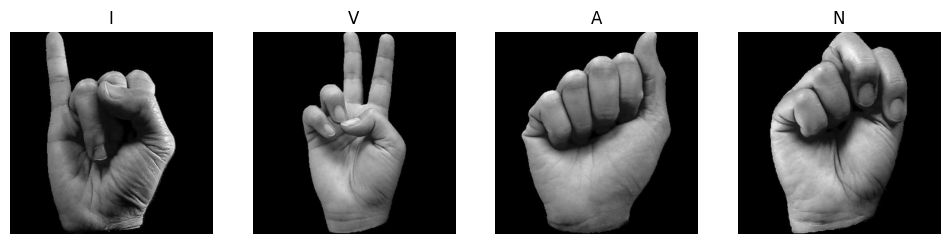

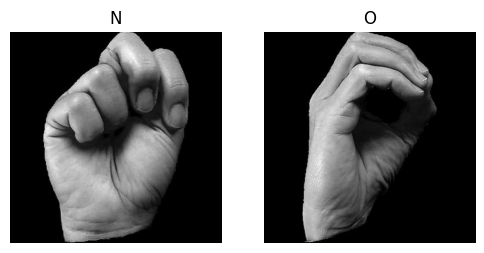

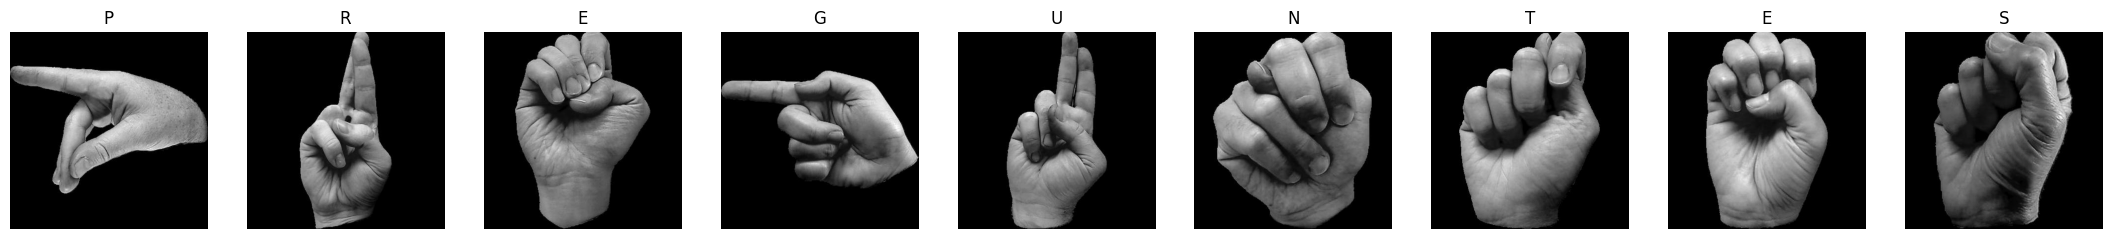

In [5]:

mostrar_imagenes_de_palabra("IVAN")
mostrar_imagenes_de_palabra("NO")
mostrar_imagenes_de_palabra("PREGUNTES")